<a href="https://www.kaggle.com/code/rinichristy/statistical-analysis-of-kc-house-sale-data?scriptVersionId=95873403" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Statistical Analysis of King County House Sale Data**
---------------------------------------------------------
**Part: 2 of King County House Sale Data**


The aim of this project is to:<br>
[Part 1. Explore & Visualize the King County House sale data](https://www.kaggle.com/code/rinichristy/kc-data-exploration-and-visualization); <br>
[Part 2. Statistical Analysis of the data](https://www.kaggle.com/code/rinichristy/statistical-analysis-of-kc-house-sale-data);<br>
[Part 3. Build various regression models to predict the house sale price](https://www.kaggle.com/rinichristy/king-county-house-sale-price-prediction); <br>
[Part 4. K-means, K-medoids and DBSCAN Cluster analysis of KC data](https://www.kaggle.com/code/rinichristy/cluster-analysis-of-kc-data). <br>
[Part 5. Classification Prediction of K-medoids clusters of KC House Sale Data](https://www.kaggle.com/rinichristy/prediction-of-k-medoids-clusters-of-kc-data)

## **Table of Contents**

  * [Data Set Information: King County House Sale Data Set](#Dataset)<br>
  * [Data Preprocessing](#Preprocessing)<br>
  * [Statistical Analysis](#Analysis)<br>

## **Import the required libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

## **Load the dataset**

In [2]:
df = pd.read_csv("../input/kc-house/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **Dataset Information:**<a name ='Dataset'></a>
The King County House sale dataset contains information regarding houses sold during the one year period ranging from May 2014 to May 2015. 

The dataset contains the following information:

| Features |  Description|
|----------------|------------------|
 |Id|            Unique Id for each house sold     |
|Date|         Date of House sale     |
|price |        House sale price     |
|bedrooms|   Number of bedrooms     |
|bathrooms|    Number of bathrooms, where .5 accounts for a bathroom with a toilet but no shower |
|sqft_living|    Square footage of interior living space of the house |
|sqft_lot|           Land area in square feet|
|floors|            Number of floors |
|waterfront|    Label to indicate whether the house was with waterfront or not|
|view|            Labels from 0 to 4 to indicate the view of house.|
|condition|     Labels from 1 to 5 to indicate the condition of the house|
|grade|            Labels from 1 to 13 to indicate the quality levels of construction and design, with 1 to 3 falls in the lowest level, 7 in the average label, and 11-13 in the highest quality level.|
|sqft_above|           Above ground level interior housing space in square feet. |
|sqft_basement| Below ground level interior housing space in square feet. |
|yr_built|            The year of construction of the house ranging from 1900 to 2015     |
|yr_renovated|    The year of last renovation of the house ranging from 1934 to 2015|
|zipcode | Zipcode area of the house|
|lat|   Latitude |
|long|  Longitude |
|sqft_living15| The interior living space in square feet for the nearest 15 neighbors|
|sqft_lot15| The land area in square feet for the nearest 15 neighbors |

## **Data Preprocessing** <a name = 'Preprocessing'></a>

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### **Dropping outlier from the data**

In [4]:
df[df['bedrooms']== 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [5]:
df['price'].mean()/df['bedrooms'].mean()

160223.52936009006

It seems that the house with number of bedrooms 33 is an outlier. Checking the row for that value it was a 1620 square feet house with 1.75 bathrooms and a sale value of 640000. The average price per bedroom house calculated is 160223.5. So this entry is unreliable and is omitted from further analysis.  

In [6]:
df.shape

(21613, 21)

In [7]:
df.drop(15870, axis = 0, inplace = True)
# reset index, because a row is droped.
df.reset_index(drop=True, inplace = True)
df.shape

(21612, 21)

### **Checking for Missing Values**

In [8]:
df[df.columns[df.isnull().sum()>0]].isnull().sum()

Series([], dtype: float64)

No missing values detected. 

### **Feature Engineering from Date**
Extracting new features from date column adds extra dimension to the data. Features like date, month, year, day of week, month end or not etc can be extracted by splitting the date feature.   

In [9]:
# Convert to date time object
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [10]:
df['Date'] = df['date'].astype('str').apply(lambda x: x.split('-')[2])
df['Month'] = df['date'].apply(lambda x:x.month)
df['Year'] = df['date'].apply(lambda x:x.year)
df['Day of Week'] = df['date'].apply(lambda x: x.dayofweek)
df['Date'] = df['Date'].astype('int')
df['monthend'] = df['Date'].apply(lambda x: 1 if (x>20)  else 0)
df['monthbeginning'] = df['Date'].apply(lambda x: 1 if (x<10)  else 0)
df.drop(['date', 'id'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,Date,Month,Year,Day of Week,monthend,monthbeginning
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,47.5112,-122.257,1340,5650,13,10,2014,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,47.7210,-122.319,1690,7639,9,12,2014,1,0,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,47.7379,-122.233,2720,8062,25,2,2015,2,1,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,47.5208,-122.393,1360,5000,9,12,2014,1,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,47.6168,-122.045,1800,7503,18,2,2015,2,0,0


## **Statistical Analysis**<a name = 'Analysis'></a>

### **Correlation and Causation**
Correlation: a measure of the extent of interdependence between variables.
Causation: the relationship between cause and effect between two variables.
It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler than determining causation as causation may require independent experimentation.<br>
**Pearson Correlation**<br>
The Pearson Correlation measures the linear dependence between two variables X and Y.
The resulting coefficient is a value between -1 and 1 inclusive, where:
* 1: Total positive linear correlation.
* 0: No linear correlation, the two variables most likely do not affect each other.
* 1: Total negative linear correlation.<br>
Pearson Correlation is the default method of the function "corr".


In [11]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Date', 'Month', 'Year', 'Day of Week',
       'monthend', 'monthbeginning'],
      dtype='object')

In [12]:
df.drop(['Date', 'Month', 'Year', 'Day of Week','monthend', 'monthbeginning'], axis = 1).corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315445,0.525147,0.702047,0.089664,0.256811,0.266371,0.397299,0.036336,0.667447,0.605591,0.323812,0.054023,0.126437,-0.053209,0.306998,0.021637,0.585404,0.082451
bedrooms,0.315445,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.081930,0.025478,0.366502,0.490600,0.309490,0.159167,0.019617,-0.157093,-0.010541,0.133882,0.402626,0.030402
bathrooms,0.525147,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,0.187732,-0.124946,0.664979,0.685339,0.283789,0.506012,0.050735,-0.203858,0.024594,0.223028,0.568628,0.087170
sqft_living,0.702047,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,0.284606,-0.058704,0.762701,0.876597,0.435065,0.318037,0.055358,-0.199421,0.052552,0.240209,0.756419,0.183280
sqft_lot,0.089664,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,0.074707,-0.008935,0.113616,0.183507,0.015293,0.053073,0.007641,-0.129571,-0.085675,0.229516,0.144602,0.718556
floors,0.256811,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,0.029432,-0.263706,0.458171,0.523866,-0.245684,0.489302,0.006330,-0.059102,0.049655,0.125388,0.279856,-0.011282
waterfront,0.266371,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.401857,0.016665,0.082773,0.072072,0.080591,-0.026165,0.092884,0.030287,-0.014270,-0.041914,0.086461,0.030702
view,0.397299,0.081930,0.187732,0.284606,0.074707,0.029432,0.401857,1.000000,0.046031,0.251315,0.167640,0.276959,-0.053452,0.103915,0.084834,0.006170,-0.078413,0.280432,0.072571
condition,0.036336,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,0.046031,1.000000,-0.144632,-0.158136,0.174057,-0.361380,-0.060602,0.002973,-0.015048,-0.106423,-0.092731,-0.003373
grade,0.667447,0.366502,0.664979,0.762701,0.113616,0.458171,0.082773,0.251315,-0.144632,1.000000,0.755919,0.168412,0.446952,0.014409,-0.184852,0.114111,0.198355,0.713198,0.119241


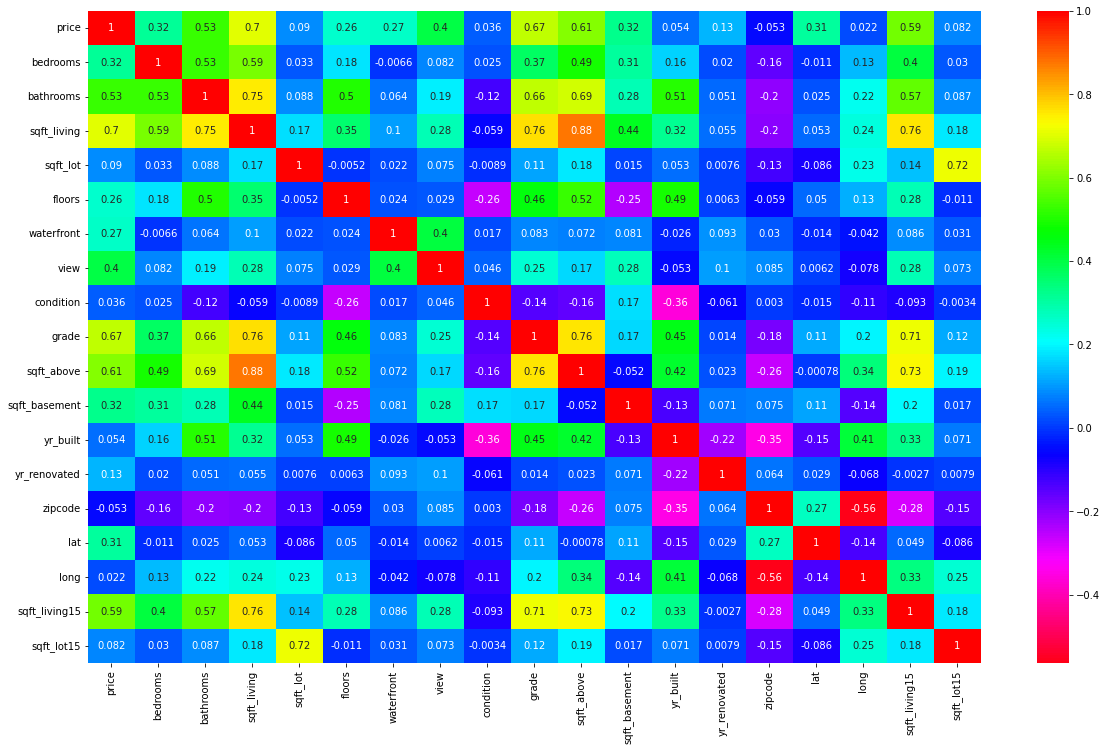

In [13]:
plt.figure(figsize = (20,12))
sns.heatmap(df.drop(['Date', 'Month', 'Year', 'Day of Week','monthend', 'monthbeginning'], axis = 1).corr(), cmap ='hsv_r', annot = True);

In [14]:
df.drop(['Date', 'Month', 'Year', 'Day of Week','monthend', 'monthbeginning'], axis = 1).corr().unstack().sort_values(ascending = False).drop_duplicates()

price          price          1.000000
sqft_above     sqft_living    0.876597
grade          sqft_living    0.762701
sqft_living15  sqft_living    0.756419
grade          sqft_above     0.755919
                                ...   
condition      floors        -0.263706
sqft_living15  zipcode       -0.279020
yr_built       zipcode       -0.346859
condition      yr_built      -0.361380
zipcode        long          -0.564065
Length: 172, dtype: float64

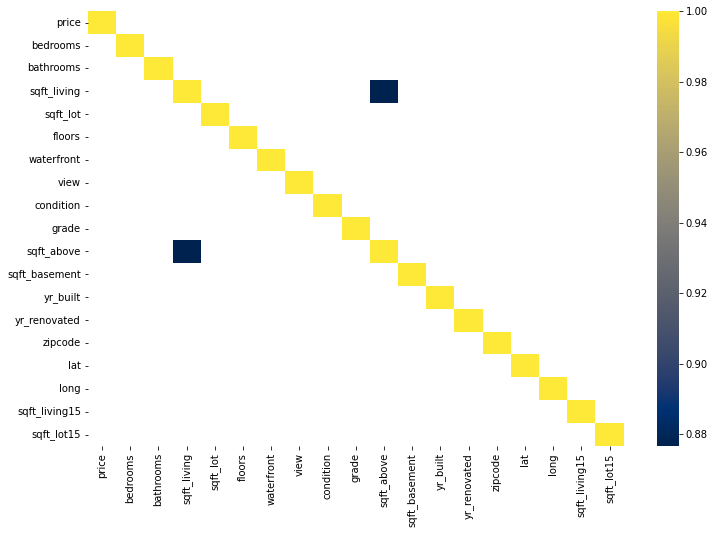

In [15]:
corr = df.drop(['Date', 'Month', 'Year', 'Day of Week','monthend', 'monthbeginning'], axis = 1).corr()
corr_top = corr[abs(corr)>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(corr_top, cmap="cividis");

### **P-value:**
Sometimes it is important to know the significance of the correlation estimate.The P-value is the probability value that the correlation between any two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.
By convention, when the<br>
* p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.<br>
* p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.<br>
* p-value is $<$ 0.1: there is weak evidence that the correlation is significant.<br>
* p-value is $>$ 0.1: there is no evidence that the correlation is significant.<br>
This information is obtained using "stats" module in the "scipy" library.

In [16]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['sqft_living'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7020466360937231  with a P-value of P = 0.0


**Conclusion:** <br>Since the p-value is < 0.001, the correlation between sqft_living and price is statistically significant, although the linear relationship isn't extremely strong (0.702)

In [17]:
pearson_coef, p_value = stats.pearsonr(df['bathrooms'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.5251470947359651  with a P-value of P =  0.0


**Conclusion:** <br>Since the p-value is < 0.001, the correlation between number of bathrooms and price is statistically significant, although the linear relationship isn't that good (0.525)


In [18]:
pearson_coef, p_value = stats.pearsonr(df['yr_built'], df['condition'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is -0.36137966916567565  with a P-value of P =  0.0


**Conclusion:** <br>Since the p-value is < 0.001, the slight negative correlation (-0.361) between age of property and condition of house is statistically significant


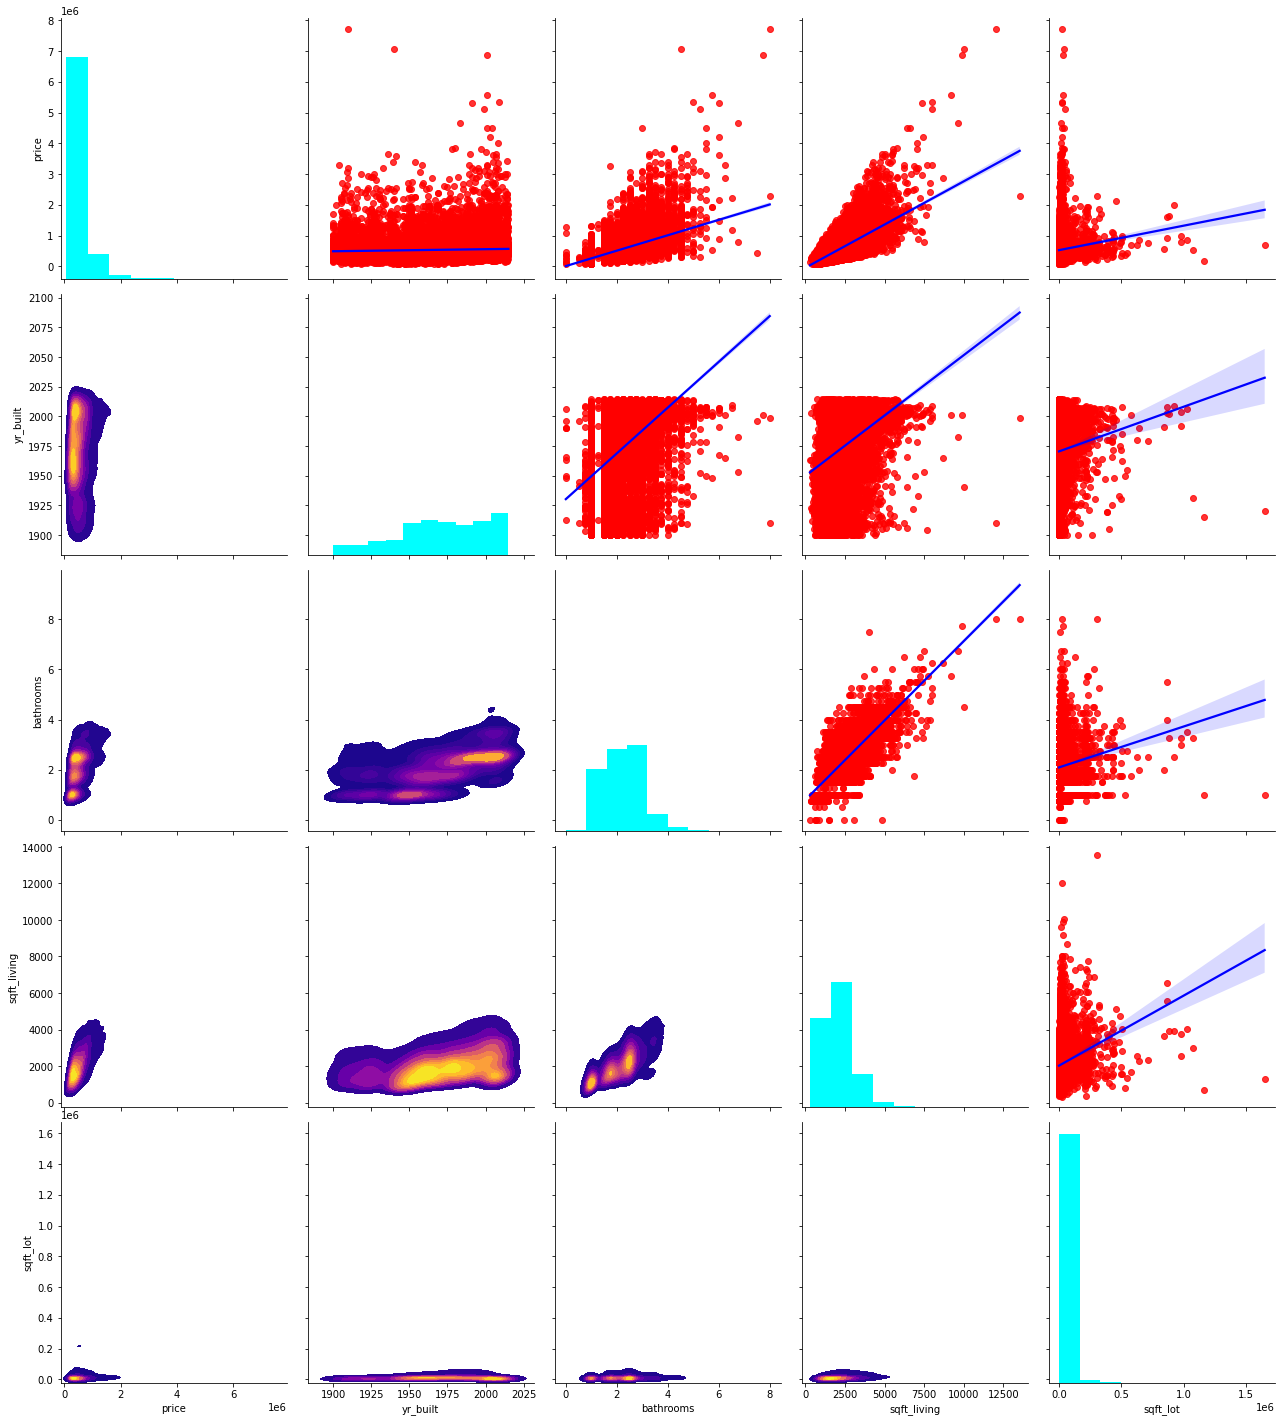

In [19]:
g = sns.PairGrid(df[['price','yr_built','bathrooms', 'sqft_living','sqft_lot']], height=4, aspect=0.9)
g.map_upper(sns.regplot,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
g.map_lower(sns.kdeplot, cmap="plasma", shade=True, thresh=0.05)
g.map_diag(plt.hist,color = 'cyan')
plt.tight_layout;
plt.show();

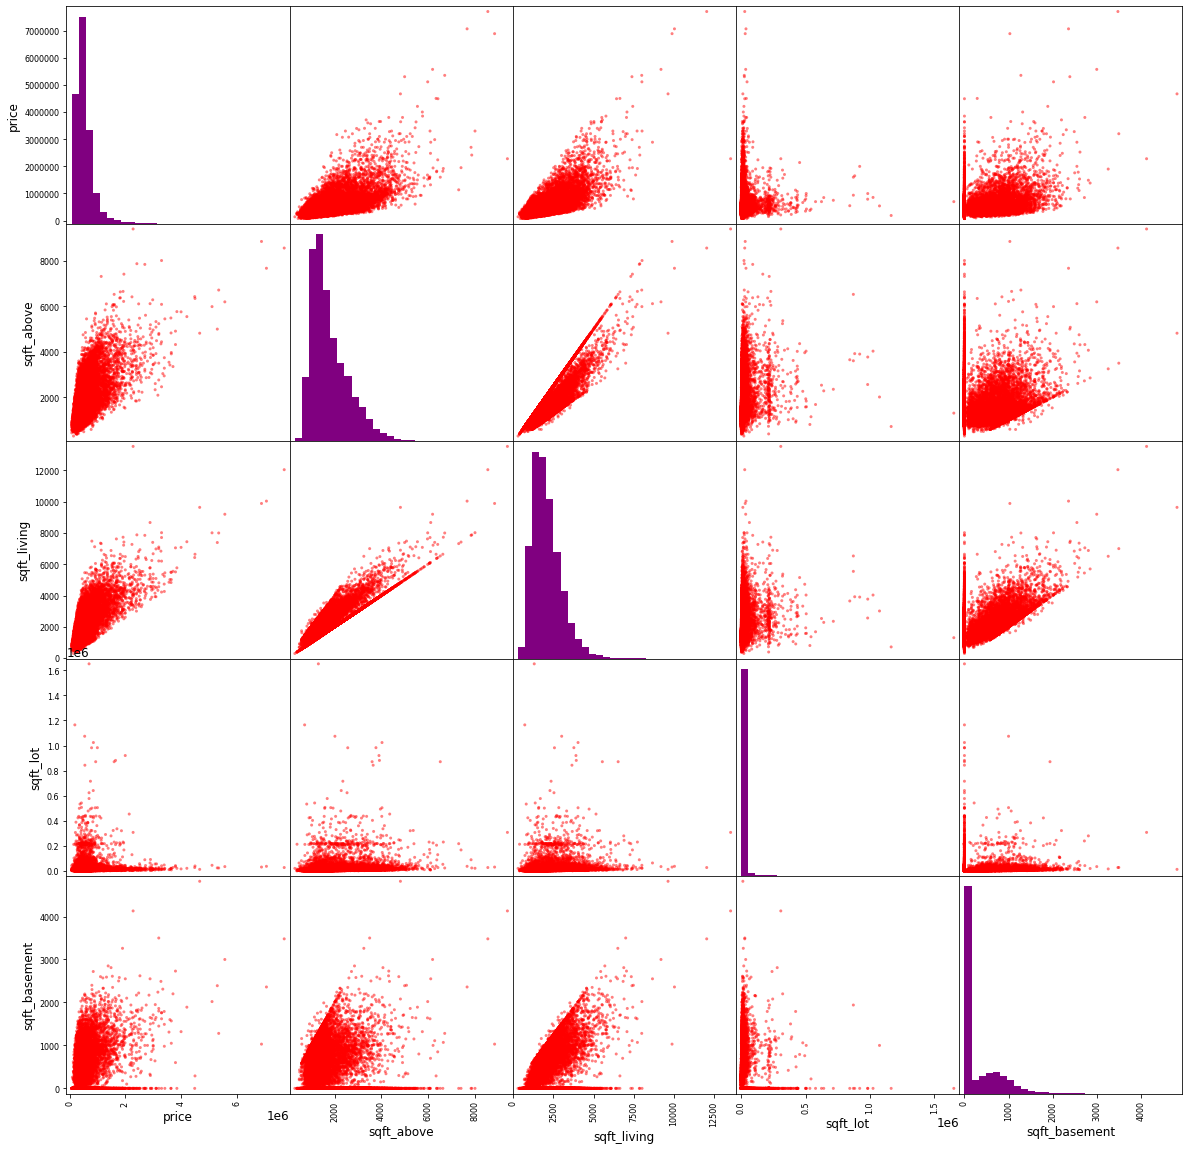

In [20]:
from pandas.plotting import scatter_matrix
#set font of all elements to size 15
plt.rc('font', size=12)
scatter_matrix(df[['price','sqft_above', 'sqft_living','sqft_lot', 'sqft_basement']], 
               figsize=(20, 20), diagonal='hist', hist_kwds={'bins':30, 'color': 'purple'}, color = 'red')
#plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(1900,350000000))
plt.tight_layout;
plt.show()

House sale price icreases with increase in square footage of above ground level, below ground level and total interior living space of the house. 

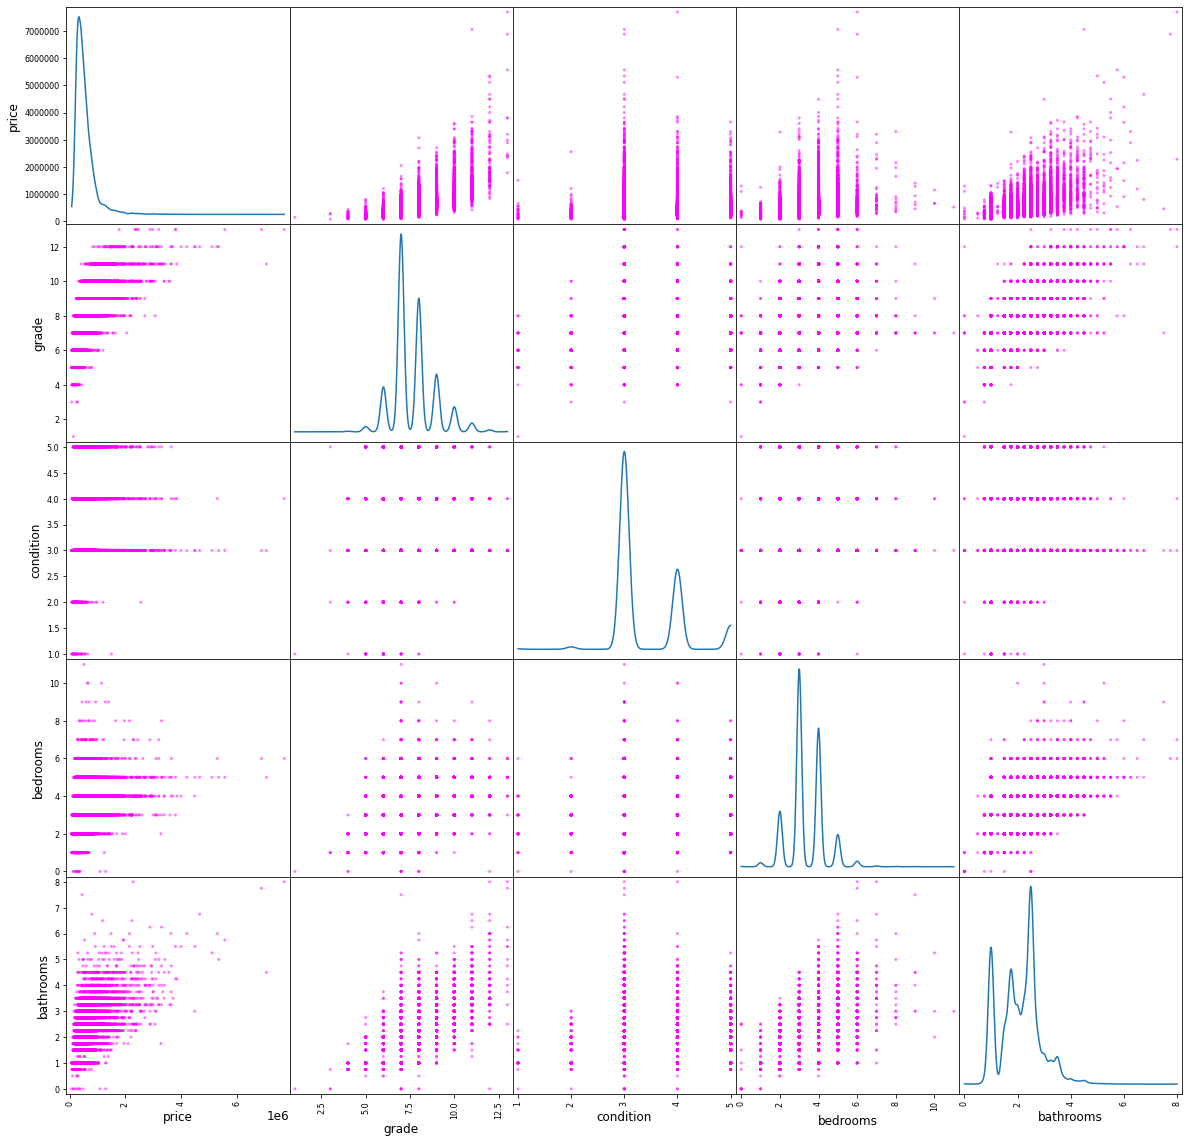

In [21]:
from pandas.plotting import scatter_matrix
#set font of all elements to size 15
plt.rc('font', size=12)
scatter_matrix(df[['price','grade','condition', 'bedrooms','bathrooms']], figsize=(20, 20), diagonal='kde', color = 'magenta')
plt.tight_layout;
plt.show()

House sale price increases with increase in number of bathrooms and with increase in levels of grade and condition. 

#### **House sale price vs Decades of Renovation**
Convert yr_renovated to the corresponding decade. 

In [22]:
renovated = df.groupby('yr_renovated').mean()
renovated.reset_index(inplace = True)
renovated.head()

,yr_renovated,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,Date,Month,Year,Day of Week,monthend,monthbeginning
0,0,530355.521065,3.365784,2.106641,2069.288772,15039.991835,1.493623,0.005846,0.217557,3.417577,...,47.559192,-122.211867,1986.981061,12723.400473,15.673012,6.566045,2014.325297,2.010774,0.341337,0.295826
1,1934,459950.000000,3.000000,1.750000,1850.000000,6869.000000,1.000000,0.000000,2.000000,5.000000,...,47.464800,-122.363000,1850.000000,10096.000000,13.000000,6.000000,2014.000000,4.000000,0.000000,0.000000
2,1940,378400.000000,2.000000,1.000000,1150.000000,4470.000000,1.000000,0.000000,0.000000,3.500000,...,47.627800,-122.360000,1295.000000,5500.000000,11.000000,8.000000,2014.000000,0.000000,0.000000,0.500000
3,1944,521000.000000,3.000000,2.000000,1840.000000,6000.000000,1.000000,0.000000,0.000000,4.000000,...,47.550800,-122.392000,2010.000000,6000.000000,23.000000,10.000000,2014.000000,3.000000,1.000000,0.000000
4,1945,398666.666667,2.666667,1.583333,1530.000000,5666.666667,1.333333,0.000000,0.000000,3.333333,...,47.642633,-122.320333,1540.000000,6577.333333,13.666667,5.000000,2014.333333,2.333333,0.333333,0.333333


In [23]:
# Average Price of non-renovated houses
renovated.iloc[0]['price']

530355.5210648372

In [24]:
# Average Price of renovated houses
renovated.iloc[1:70].mean()['price']

645816.5905966576

In [25]:
renovated['yr_renovated'].iloc[1:70] = renovated['yr_renovated'].iloc[1:70].astype('string').apply(lambda x: x[2:3]+'0')
renovated.head()

,yr_renovated,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,Date,Month,Year,Day of Week,monthend,monthbeginning
0,0,530355.521065,3.365784,2.106641,2069.288772,15039.991835,1.493623,0.005846,0.217557,3.417577,...,47.559192,-122.211867,1986.981061,12723.400473,15.673012,6.566045,2014.325297,2.010774,0.341337,0.295826
1,30,459950.000000,3.000000,1.750000,1850.000000,6869.000000,1.000000,0.000000,2.000000,5.000000,...,47.464800,-122.363000,1850.000000,10096.000000,13.000000,6.000000,2014.000000,4.000000,0.000000,0.000000
2,40,378400.000000,2.000000,1.000000,1150.000000,4470.000000,1.000000,0.000000,0.000000,3.500000,...,47.627800,-122.360000,1295.000000,5500.000000,11.000000,8.000000,2014.000000,0.000000,0.000000,0.500000
3,40,521000.000000,3.000000,2.000000,1840.000000,6000.000000,1.000000,0.000000,0.000000,4.000000,...,47.550800,-122.392000,2010.000000,6000.000000,23.000000,10.000000,2014.000000,3.000000,1.000000,0.000000
4,40,398666.666667,2.666667,1.583333,1530.000000,5666.666667,1.333333,0.000000,0.000000,3.333333,...,47.642633,-122.320333,1540.000000,6577.333333,13.666667,5.000000,2014.333333,2.333333,0.333333,0.333333


Recently renovated houses have higher prices compared to non renovated houses & those renovated decades back 

#### **House Sale Price Trend with the Decade in which the house was initially built**

In [26]:
built = df.groupby('yr_built').mean()
built.reset_index(inplace = True)
built['yr_built']= built['yr_built'].astype('string').apply(lambda x: x[0:3]+'0')
built.head()

,yr_built,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,Date,Month,Year,Day of Week,monthend,monthbeginning
0,1900,581387.206897,3.275862,1.729885,1732.011494,10869.597701,1.505747,0.000000,0.252874,3.528736,...,47.594106,-122.288874,1667.114943,7222.195402,15.931034,6.655172,2014.298851,1.816092,0.344828,0.298851
1,1900,556935.931034,3.620690,1.577586,1763.620690,4142.931034,1.568966,0.000000,0.068966,3.655172,...,47.630710,-122.329793,1530.965517,3947.862069,16.517241,6.551724,2014.275862,1.724138,0.413793,0.344828
2,1900,673007.407407,3.555556,1.925926,1919.629630,4766.518519,1.740741,0.000000,0.074074,3.629630,...,47.616689,-122.314556,1913.703704,4576.888889,14.814815,6.185185,2014.259259,2.037037,0.370370,0.370370
3,1900,480958.195652,3.065217,1.505435,1507.739130,6364.565217,1.456522,0.021739,0.239130,3.500000,...,47.591474,-122.287261,1537.608696,5303.760870,15.478261,6.760870,2014.282609,2.369565,0.326087,0.304348
4,1900,583756.644444,2.911111,1.500000,1603.177778,5410.000000,1.344444,0.000000,0.066667,3.800000,...,47.609891,-122.316822,1630.222222,4600.066667,17.400000,6.066667,2014.377778,1.977778,0.400000,0.133333


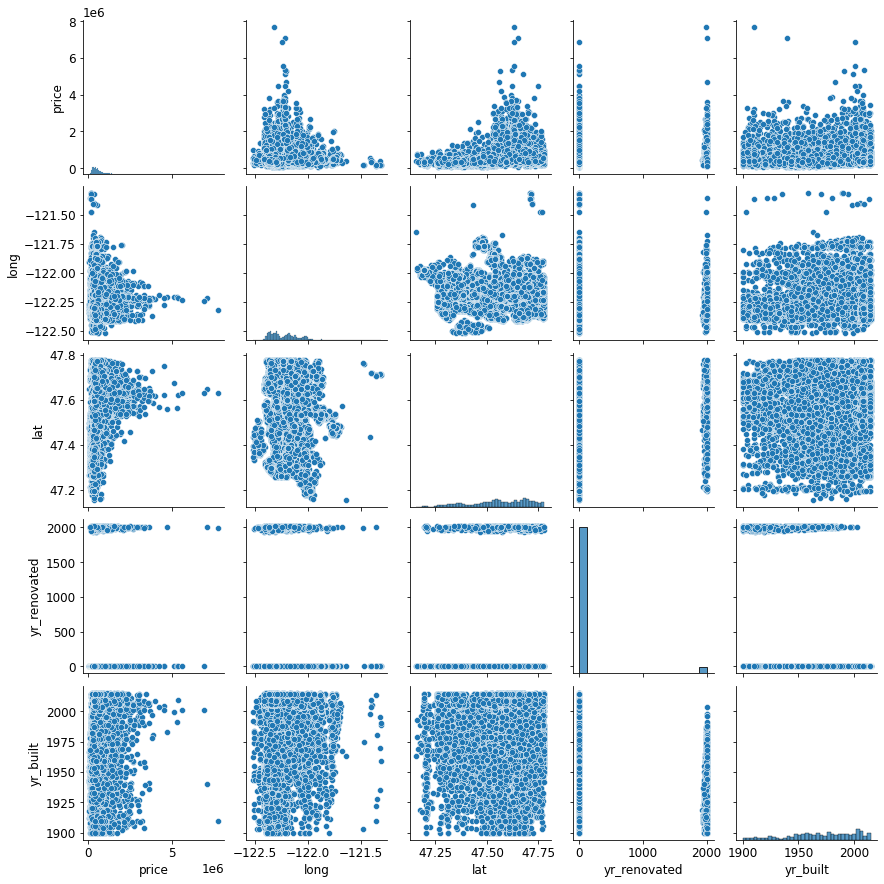

In [27]:
sns.pairplot(df[['price','long','lat', 'yr_renovated','yr_built']]);

### **One-way ANOVA: Analysis of Variance**
The one-way Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of three or more groups, for a continuous variable. ANOVA can be used to find the correlation between different groups of a categorical variable.<br>

**In order to use this test, we must have two variables:**<br>
1. a categorical independent variable with three or more categories
2. a continuous dependent variable.<br>

**The null and alternative hypotheses of the one-way ANOVA:**

H0: the group means are equal in the total population<br>
H1: at least one group mean is different in the total population

The null hypothesis will be rejected if the p value of the Fisher test is lower than 0,05.

**Assumptions:**
1.	The independent variable is categorical, with three or more categories.
2.	The dependent variable is continuous.
3.	There is independence of observations. In other words, there is no relationship between the members of the groups.
4.	The dependent variable is normally distributed in all groups.
5.	The dependent variable does not present significant outliers in any group.
6.	The dependent variable has equal variances in all groups. If this condition is not met, we have to use a robust version of the F test, called the Welch test.

**ANOVA returns two parameters:**
* F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. The F-test calculates the ratio of variation between groups means over the variation within each of the sample group means. A larger score means there is a larger difference between the means.
* P-value: P-value tells how statistically significant is our calculated score value. If the price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value. Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.


#### **House Sale Price vs Number of bedrooms**

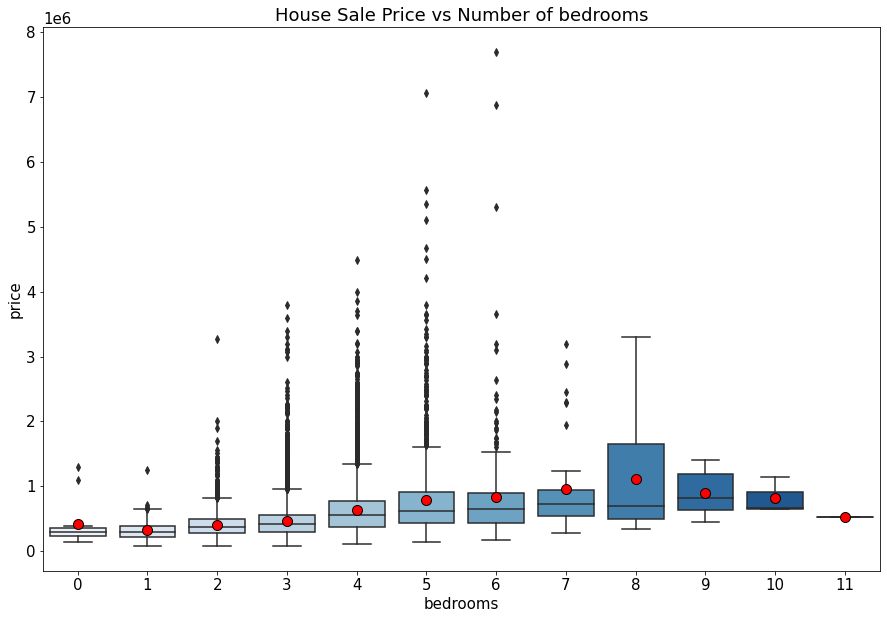

In [28]:
plt.figure(figsize=(15,10))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.boxplot(x="bedrooms", y="price", data=df,palette="Blues", showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"})
plt.title ("House Sale Price vs Number of bedrooms");

**Shapiro-Wilk test for normality**

The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.

In [29]:
#perform Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro(df['bedrooms'])

ShapiroResult(statistic=0.8797129392623901, pvalue=0.0)

From the output it can be seen that the test statistic is 0.8797 and the corresponding p-value is <0.05. For all groups P-value is not higher than 5%.  So null hypothesis of normality in each group is not confirmed. So the dependent variable is not normally distributed in all groups not satisfying assumption number 4. In other words, Since the p-value is less than .05, the null hypothesis of normality is to be rejected. We do have sufficient evidence to say that the sample data does not come from a normal distribution. Even though further test for ANOVA cannot be carried out, since the assumption 4 for normality is not met, just continue further for the sake of doing the test, even though the results will be erroneous. 

Also, there are outliers in the groups, failing the fifth assumption that the dependent variable does not present significant outliers in any group.

**Levene’s Test for variance**<br>
Levene’s Test is used to determine whether two or more groups have equal variances. It should be used before doing ANOVA test to check whether the sixth assumption of dependent variable's equal variances in all groups is satified or not. 

The null and alternative hypotheses of the Levene test:<br>

H0: the variances of the groups are equal in the total population<br>
H1: the variance of the groups are significantly different in the total population

We will reject the null hypothesis if the p value is lower than 0,05.


In [30]:
df_1 = df[df['bedrooms'] == 1]['price']
df_3 = df[df['bedrooms'] == 3]['price']
df_5 = df[df['bedrooms'] == 5]['price']
df_8 = df[df['bedrooms'] == 8]['price']

In [31]:
import scipy.stats as stats
#Levene's test centered at the median
stats.levene(df_1, df_3, df_5, df_8, center='median')

LeveneResult(statistic=236.32647681117683, pvalue=7.433451173041566e-149)

In [32]:
#Levene's test centered at the mean
stats.levene(df_1, df_3, df_5, df_8, center='mean')

LeveneResult(statistic=346.6707704919826, pvalue=1.2233752074270071e-215)

In both methods, the p-value is less than .05. This means in both cases we would fail to reject the null hypothesis of equal variance. This means we do have significant evidence to say that the variance in price among the four bedroom groups is significantly different failing the sixth assumption. This can be confirmed further by Bartlett's test.  

We can perform Bartlett’s test to determine if the variances between each group is equal.

If the p-value of the test statistic is less than some significance level (like α = .05) then we can reject the null hypothesis and conclude that not all groups have the same variance. When the Variance test is failed, test should be reported only with Welch test and not with ANOVA. 

In [33]:
#perform Bartlett's test 
import scipy.stats as stats
stats.bartlett(df_1, df_3, df_5, df_8)

BartlettResult(statistic=2801.280189740749, pvalue=0.0)

The p-value from Bartlett’s test is less than α = .05, which means we can reject the null hypothesis that each group has the same variance.

Thus, the assumption of equal variances is violated and we can proceed to perform Welch’s ANOVA.

**Install Pingouin to perform Welch’s ANOVA**

In [34]:
pip install Pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.1/183.1 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for Pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=3688117c311770629ab5587405f9342a5fbc807742d6f554c74300c94c5eeb05
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=d0b02330cbfe55b33201b1aa6fa9e50df641c8534f300840753566999ed8d5fb
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built Pingouin littleutils
Note: you may need to restart the kernel to use updated packages.


In [35]:
df_bedroom = df[(df['bedrooms'] == 1) | (df['bedrooms'] == 3) | (df['bedrooms'] == 5) | (df['bedrooms'] == 8)]

In [36]:
import pingouin as pg
pg.welch_anova(dv='price', between= 'bedrooms', data=df_bedroom)

,Source,ddof1,ddof2,F,p-unc,np2
0,bedrooms,3,56.5659,217.224122,5.277300e-31,0.108475


The overall p-value (5.277300e-31) from the ANOVA table is less than α = .05, which means that the null hypothesis that the prices are equal between the four groups of number of bedrooms can be rejected. It simply means that there is significant difference among the prices of different number of bedrooms. 

Now, perform the Games-Howell post-hoc test to determine exactly which group means are different

In [37]:
pg.pairwise_gameshowell(dv='price', between= 'bedrooms', data=df_bedroom)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,3,317642.884422,4.662321e+05,-148589.194059,10879.941862,-13.657168,223.703639,0.000000,-0.977814
1,1,5,317642.884422,7.865998e+05,-468956.944435,18258.803953,-25.683881,1189.461912,0.000000,-1.929716
2,1,8,317642.884422,1.105077e+06,-787434.038655,249144.114262,-3.160556,12.043171,0.035735,-0.901525
3,3,5,466232.078481,7.865998e+05,-320367.750376,15133.925518,-21.168847,1702.389380,0.000000,-0.570502
4,3,8,466232.078481,1.105077e+06,-638844.844596,248934.612803,-2.566316,12.002716,0.098985,-0.712184
5,5,8,786599.828857,1.105077e+06,-318477.094220,249366.100820,-1.277147,12.086151,0.593230,-0.355486


From the p-values it can be seen that the mean difference between groups 1 and 3, 1 and 5, 1 and 8, and 3 and 5 are significantly different and the mean difference between groups 3 and 8, and 5 and 8 are not significantly different.

#### **House Sale Price vs Number of floors**

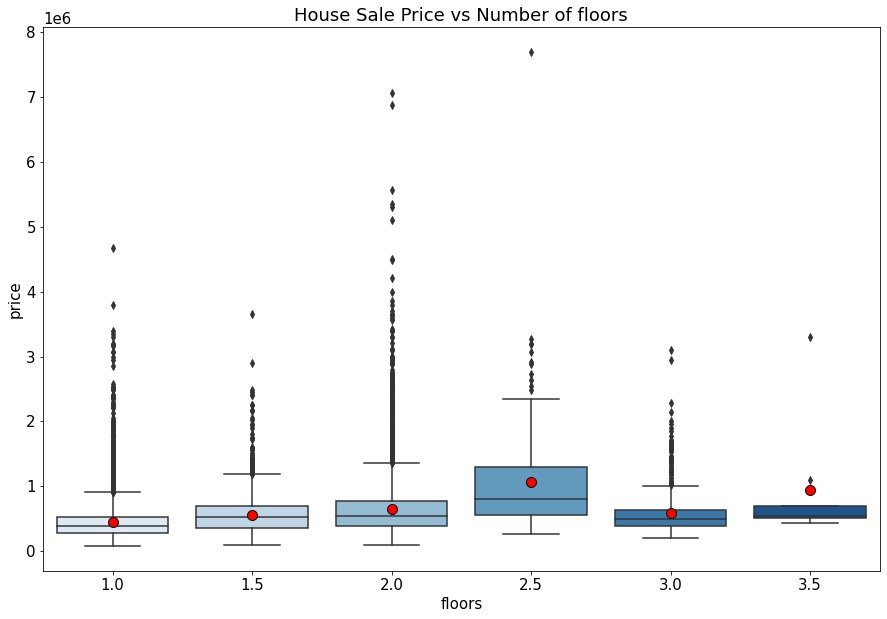

In [38]:
plt.figure(figsize=(15,10))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.boxplot(x="floors", y="price", data=df,palette="Blues", showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"})
plt.title ("House Sale Price vs Number of floors");

In [39]:
df_one = df[df['floors'] == 1.0]['price']
df_oneandhalf = df[df['floors'] == 1.5]['price']
df_two = df[df['floors'] == 2]['price']
df_twoandhalf = df[df['floors'] == 2.5]['price']
df_three = df[df['floors'] == 3.0]['price']
df_threeandhalf = df[df['floors'] == 3.5]['price']

In [40]:
#perform Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro(df['floors'])

ShapiroResult(statistic=0.7506186962127686, pvalue=0.0)

In [41]:
# Test for variance
import scipy.stats as stats
#Levene's test centered at the median
stats.levene(df_one, df_oneandhalf, df_two, df_twoandhalf,df_three, df_threeandhalf, center='median')

LeveneResult(statistic=150.74847283389005, pvalue=6.874910331531649e-158)

In [42]:
# Test for variance
#Levene's test centered at the mean
stats.levene(df_one, df_oneandhalf, df_two, df_twoandhalf,df_three, df_threeandhalf,  center='mean')

LeveneResult(statistic=213.92744277221507, pvalue=1.7224509160363454e-223)

In [43]:
# Test for variance
#perform Bartlett's test 
import scipy.stats as stats
stats.bartlett(df_one, df_oneandhalf, df_two, df_twoandhalf,df_three, df_threeandhalf)

BartlettResult(statistic=2893.0603104379397, pvalue=0.0)

Failed both Normaility and Variance tests. So continue further with analysis to perform Welch’s ANOVA.

In [44]:
import pingouin as pg
pg.welch_anova(dv='price', between= 'floors', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,floors,5,77.181168,320.942623,3.996960e-50,0.084646


In [45]:
pg.pairwise_gameshowell(dv='price', between= 'floors', data=df)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1.0,1.5,4.421621e+05,5.589806e+05,-116818.534495,7400.427533,-15.785376,2452.502763,0.000000e+00,-0.392141
1,1.0,2.0,4.421621e+05,6.488912e+05,-206729.054893,5419.988950,-38.141970,12813.044000,5.958789e-12,-0.559231
2,1.0,2.5,4.421621e+05,1.060346e+06,-618184.382246,67688.552993,-9.132776,160.456825,0.000000e+00,-0.725119
3,1.0,3.0,4.421621e+05,5.825260e+05,-140363.930715,13898.576763,-10.099159,655.505460,0.000000e+00,-0.419417
4,1.0,3.5,4.421621e+05,9.333125e+05,-491150.391563,346002.605640,-1.419499,7.000763,7.175106e-01,-0.502021
5,1.5,2.0,5.589806e+05,6.488912e+05,-89910.520398,8431.420023,-10.663746,3940.917603,0.000000e+00,-0.270786
6,1.5,2.5,5.589806e+05,1.060346e+06,-501365.847751,67995.976129,-7.373463,163.390232,1.182187e-10,-0.604887
7,1.5,3.0,5.589806e+05,5.825260e+05,-23545.396220,15325.893103,-1.536315,948.912662,6.407845e-01,-0.071296
8,1.5,3.5,5.589806e+05,9.333125e+05,-374331.857068,346062.878207,-1.081687,7.005643,8.744957e-01,-0.383084
9,2.0,2.5,6.488912e+05,1.060346e+06,-411455.327354,67809.016526,-6.067856,161.602047,1.326944e-07,-0.482820


#### **House Sale Price vs Waterfront**

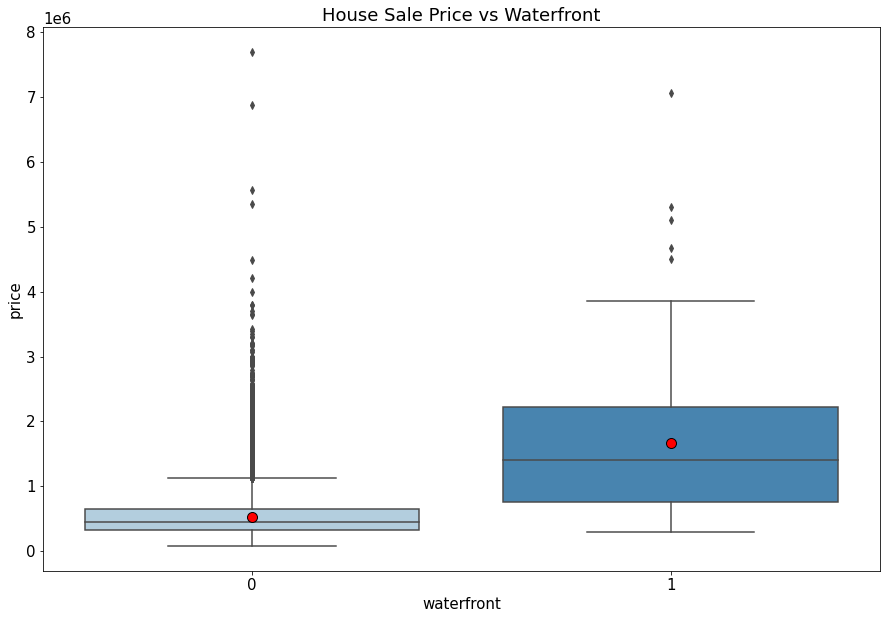

In [46]:
plt.figure(figsize=(15,10))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.boxplot(x="waterfront", y="price", data=df,palette="Blues", showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"})
plt.title ("House Sale Price vs Waterfront");

Since only two independent variables are involved independent (unpaired) sample t test should be used instead of ANOVA. For more than two variables ANOVA can be used.

**The independent sample t test** is used to find out whether a difference exists between the means of two independent groups on a continuous variable. More precisely, this test lets us determine if the difference between the means is statistically significant.

The null and alternative hypotheses of the independent samples t test:<br>

H0: there is no difference between the means of the two groups in the total population<br>
H1: there is a significant difference between the means of the two groups in the total population
We will reject the null hypothesis if the p value is lower than 0,05.

**Assumptions**<br>
1.	The independent variable is categorical (nominal or ordinal). If this variable has three or more categories, we must decide, before running the test, which categories we want to compare.
2.	The dependent variable is continuous.
3.	There is independence of observations; in other words, there is no connection between the observations(measurements) in the two groups. 
4.	The dependent variable is normally distributed in both groups.
5.	The dependent variable has no significant outliers in either group.
6.	The variances of the dependent variable in the two groups are equal (in other words, we have homogeneity of variances). 


In [47]:
#perform Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro(df['waterfront'])

ShapiroResult(statistic=0.05785614252090454, pvalue=0.0)

Shapiro-Wilk test for normality shows our dependent values are not normally distributed (<0.05). So assumption number 4 is not met.

In [48]:
waterfront0 = df[df['waterfront']== 0]
waterfront1 = df[df['waterfront']== 1]

In [49]:
# Test for variance
import scipy.stats as stats
#Levene's test centered at the median
stats.levene(waterfront0['price'], waterfront1['price'], center='median')

LeveneResult(statistic=781.866330411427, pvalue=4.804786409044238e-169)

In [50]:
# Test for variance
#Levene's test centered at the mean
stats.levene(waterfront0['price'], waterfront1['price'], center='mean')

LeveneResult(statistic=928.1916992038557, pvalue=1.205044466382505e-199)

In [51]:
# Test for variance
#perform Bartlett's test 
import scipy.stats as stats
stats.bartlett(df_one, df_oneandhalf, df_two, df_twoandhalf,df_three, df_threeandhalf)

BartlettResult(statistic=2893.0603104379397, pvalue=0.0)

Both Levene test & Bartlett's test for normality show that the variances of the two dependent groups are not equal. So assumption number 6 is not matched.

In [52]:
#perform independent two sample t-test
from scipy.stats import ttest_ind
ttest_ind(waterfront0['price'], waterfront1['price'])

Ttest_indResult(statistic=-40.62521407574458, pvalue=0.0)

**Interpretation:** Since the p-value is less than .05, we reject the null hypothesis of the t-test and conclude that there is sufficient evidence to say that the two groups means are significantly different. 

#### **House Sale Price vs View**

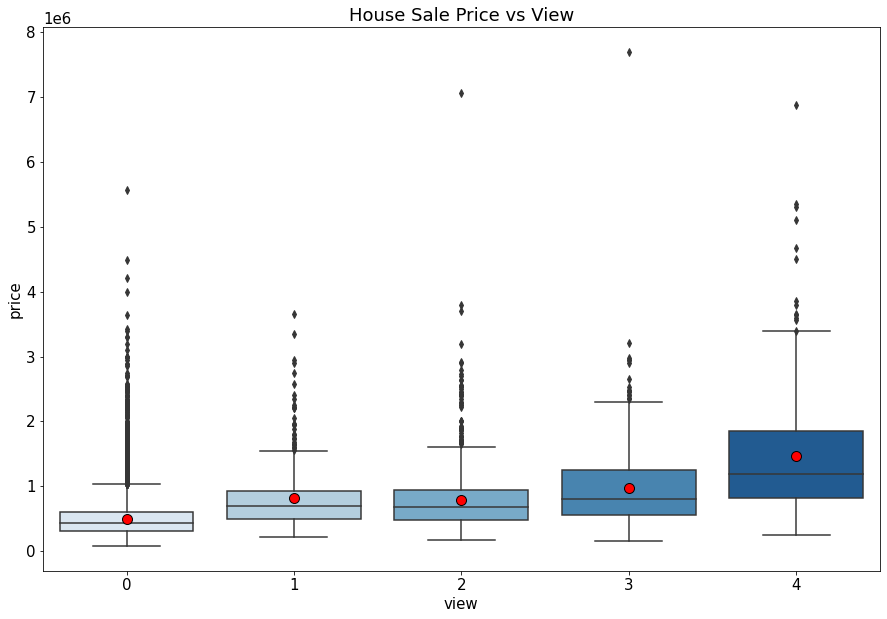

In [53]:
plt.figure(figsize=(15,10))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.boxplot(x="view", y="price", data=df,palette="Blues", showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"})
plt.title ("House Sale Price vs View");

In [54]:
#perform Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro(df['view'])

ShapiroResult(statistic=0.3396990895271301, pvalue=0.0)

In [55]:
df_zero = df[df['view'] == 0]['price']
df_one = df[df['view'] == 1]['price']
df_two = df[df['view'] == 2]['price']
df_three = df[df['view'] == 3]['price']
df_four = df[df['view'] == 4]['price']

In [56]:
# Test for variance
import scipy.stats as stats
#Levene's test centered at the median
stats.levene(df_zero, df_one, df_two, df_three,df_four, center='median')

LeveneResult(statistic=400.5653166856026, pvalue=0.0)

In [57]:
# Test for variance
#Levene's test centered at the mean
stats.levene(df_zero, df_one, df_two, df_three,df_four, center='mean')

LeveneResult(statistic=545.141468143104, pvalue=0.0)

In [58]:
# Test for variance
#perform Bartlett's test 
import scipy.stats as stats
stats.bartlett(df_zero, df_one, df_two, df_three,df_four)

BartlettResult(statistic=3620.094054327067, pvalue=0.0)

In [59]:
import pingouin as pg
pg.welch_anova(dv='price', between= 'view', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,view,4,881.442603,264.767363,2.177471e-149,0.168248


In [60]:
pg.pairwise_gameshowell(dv='price', between= 'view', data=df)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,0,1,496556.831897,8.122808e+05,-315724.005453,28117.341616,-11.228800,334.571109,7.271961e-14,-0.621464
1,0,2,496556.831897,7.924009e+05,-295844.055954,16566.094308,-17.858407,992.348946,0.000000e+00,-0.589505
2,0,3,496556.831897,9.719653e+05,-475408.442613,27208.326818,-17.472903,514.867637,1.099121e-13,-0.783742
3,0,4,496556.831897,1.463711e+06,-967154.406348,53353.162802,-18.127405,318.947365,7.527312e-14,-1.023174
4,1,2,812280.837349,7.924009e+05,19879.949499,32504.751890,0.611601,574.228087,9.732508e-01,0.038902
5,1,3,812280.837349,9.719653e+05,-159684.437160,39018.155557,-4.092568,790.353350,4.511188e-04,-0.288343
6,1,4,812280.837349,1.463711e+06,-651430.400895,60238.554065,-10.814177,482.792823,2.734479e-13,-0.846871
7,2,3,792400.887850,9.719653e+05,-179564.386659,31721.712502,-5.660615,887.980357,2.029435e-07,-0.309846
8,2,4,792400.887850,1.463711e+06,-671310.350394,55790.088518,-12.032789,380.199106,8.948398e-14,-0.776868
9,3,4,971965.274510,1.463711e+06,-491745.963735,59819.658512,-8.220474,483.758949,0.000000e+00,-0.586273


**Interpretation:** The p value obtained from ANOVA analysis is significant (p < 0.05),  and therefore, it can be concluded that there are significant differences between each group view with all other groups.

#### **House Sale Price vs Condition**

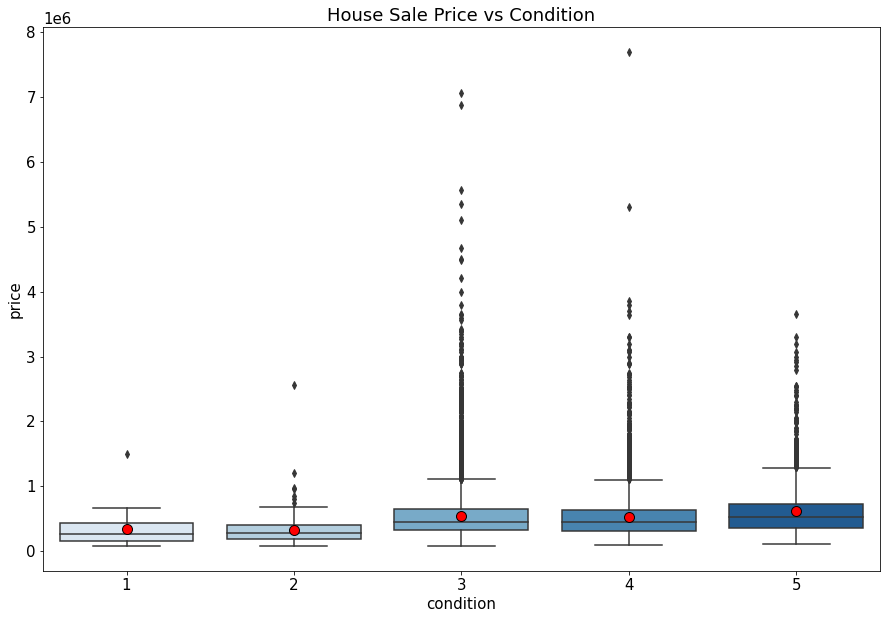

In [61]:
plt.figure(figsize=(15,10))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.boxplot(x="condition", y="price", data=df,palette="Blues", showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"})
plt.title ("House Sale Price vs Condition");

In [62]:
#perform Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro(df['condition'])

ShapiroResult(statistic=0.6976370811462402, pvalue=0.0)

In [63]:
df_one = df[df['condition'] == 1]['price']
df_two = df[df['condition'] == 2]['price']
df_three = df[df['condition'] == 3]['price']
df_four = df[df['condition'] == 4]['price']
df_five = df[df['condition'] == 5]['price']

In [64]:
import scipy.stats as stats
#Levene's test centered at the median
stats.levene(df_one, df_two, df_three,df_four,df_five,  center='median')

LeveneResult(statistic=13.55901458766227, pvalue=4.847087279473723e-11)

In [65]:
#Levene's test centered at the mean
stats.levene(df_one, df_two, df_three,df_four,df_five, center='mean')

LeveneResult(statistic=15.807634835340235, pvalue=6.337307478844394e-13)

In [66]:
# Test for Variance
#perform Bartlett's test 
import scipy.stats as stats
stats.bartlett(df_one, df_two, df_three,df_four,df_five)

BartlettResult(statistic=101.4582059193076, pvalue=4.812441464270652e-21)

In [67]:
import pingouin as pg
pg.welch_anova(dv='price', between= 'condition', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,condition,4,197.159615,52.754175,3.643640e-30,0.006875


In [68]:
pg.pairwise_gameshowell(dv='price', between= 'condition', data=df)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,334431.666667,327287.145349,7144.521318,52927.610028,0.134987,37.747180,9.999215e-01,0.026608
1,1,3,334431.666667,542012.578148,-207580.911482,49604.664503,-4.184705,29.224429,2.066606e-03,-0.764795
2,1,4,334431.666667,521200.390033,-186768.723367,49737.204651,-3.755111,29.538013,6.303105e-03,-0.687304
3,1,5,334431.666667,612401.864706,-277970.198039,50503.131264,-5.504019,31.399086,4.540779e-05,-1.013280
4,2,3,327287.145349,542012.578148,-214725.432800,18964.228734,-11.322656,180.368752,0.000000e+00,-0.868574
5,2,4,327287.145349,521200.390033,-193913.244685,19308.256201,-10.043022,193.794749,6.439294e-15,-0.777184
6,2,5,327287.145349,612401.864706,-285114.719357,21203.431290,-13.446631,279.602168,0.000000e+00,-1.075483
7,3,4,542012.578148,521200.390033,20812.188115,5665.650421,3.673398,10665.855463,2.237866e-03,0.057772
8,3,5,542012.578148,612401.864706,-70389.286557,10434.382380,-6.745899,2035.748770,1.973350e-10,-0.173232
9,4,5,521200.390033,612401.864706,-91201.474672,11047.312873,-8.255535,2521.598657,1.751044e-12,-0.228212


The difference in mean between all groups of condition are highly significant. Even between 3 and 4 there is significant difference in mean. 

#### **House sale price vs year renovated**

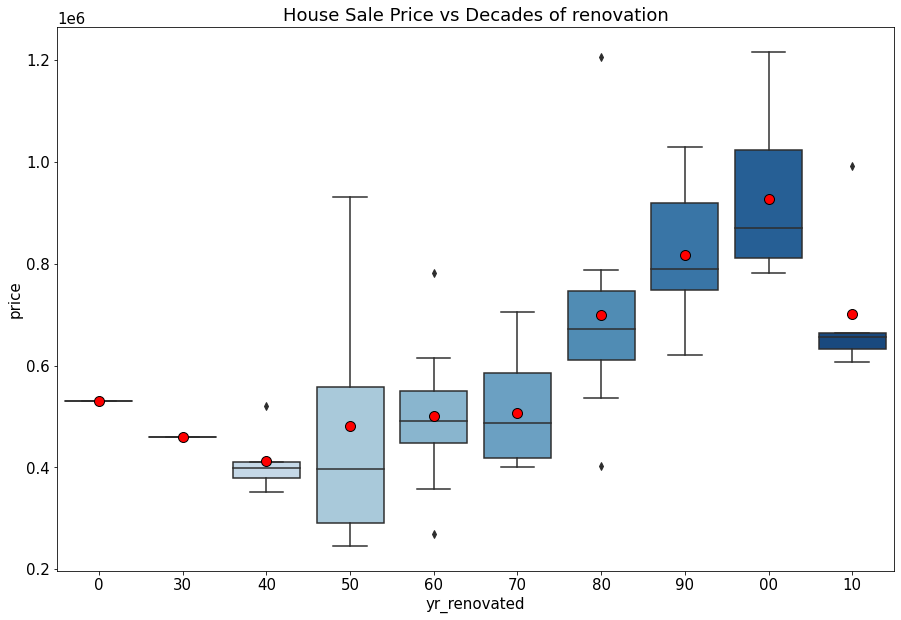

In [69]:
plt.figure(figsize=(15,10))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.boxplot(x="yr_renovated", y="price", data=renovated,palette="Blues", showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"})
plt.title ("House Sale Price vs Decades of renovation");

In [70]:
#perform Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro(renovated['yr_renovated'].astype('string'))

ShapiroResult(statistic=0.8738678693771362, pvalue=4.159774107392877e-06)

From the output it can be seen that the test statistic is 0.87386787 and the corresponding p-value is 4.15977e-6. Since the p-value is less than .05, the null hypothesis of normality can be rejected. There is sufficient evidence to say that the sample data does not come from a normal distribution. 

In [71]:
renovated_zero = renovated[renovated['yr_renovated'] == 0]['price']
renovated_30 = renovated[renovated['yr_renovated'] == '30']['price']
renovated_40 = renovated[renovated['yr_renovated'] == '40']['price']
renovated_50 = renovated[renovated['yr_renovated'] == '50']['price']
renovated_60 = renovated[renovated['yr_renovated'] == '60']['price']
renovated_70 = renovated[renovated['yr_renovated'] == '70']['price']
renovated_80 = renovated[renovated['yr_renovated'] == '80']['price']
renovated_90 = renovated[renovated['yr_renovated'] == '90']['price']
renovated_00 = renovated[renovated['yr_renovated'] == '00']['price']
renovated_10 = renovated[renovated['yr_renovated'] == '10']['price']
renovated_20 = renovated[renovated['yr_renovated'] == '20']['price']

In [72]:
# Test for variance
import scipy.stats as stats
#Levene's test centered at the median
stats.levene(renovated_40, renovated_50,
             renovated_60,renovated_70,renovated_80, renovated_90,
             renovated_00, renovated_10, center='median')

LeveneResult(statistic=1.071343800295638, pvalue=0.39292878123747454)

In [73]:
# Test for variance
#Levene's test centered at the mean
stats.levene(renovated_40, renovated_50,renovated_60,renovated_70,renovated_80, 
             renovated_90,renovated_00, renovated_10, center='mean')

LeveneResult(statistic=1.69660030844694, pvalue=0.12705205001750722)

In [74]:
# Test for Variance
#perform Bartlett's test 
import scipy.stats as stats
stats.bartlett(renovated_40, renovated_50,renovated_60,renovated_70,renovated_80, 
             renovated_90,renovated_00, renovated_10)

BartlettResult(statistic=13.64591919019144, pvalue=0.05784953772737807)

P- values of both Levene test and Bartlett's test  are greater than 0.05. So we retain the null hypothesis that variations in the groups is equal to the total population, satisfying the 6th assumption. Since this assumption is met, we can go to ANOVA. Otherwise test should be reported only with Welch test and not with ANOVA. 

In [75]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(renovated_40, renovated_50,renovated_60,renovated_70,renovated_80, 
             renovated_90,renovated_00, renovated_10)

F_onewayResult(statistic=10.104420405868433, pvalue=2.8097462220835934e-08)

Investigation of ANOVA result reveals a lower P-value indicating the difference in group means. 

#### **House sale price vs year built**

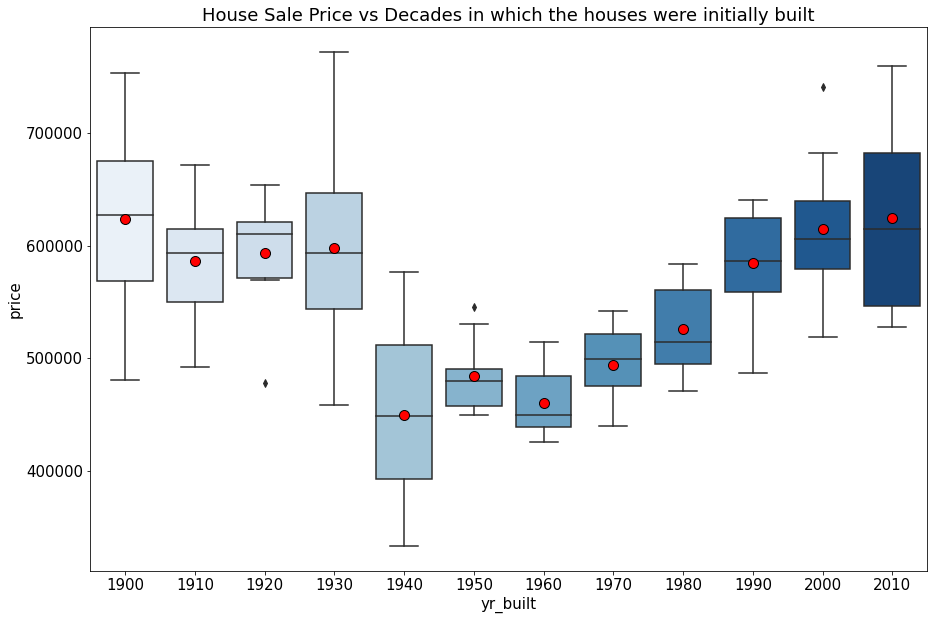

In [76]:
plt.figure(figsize=(15,10))
#set font of all elements to size 15
plt.rc('font', size=15) 
sns.boxplot(x="yr_built", y="price", data=built,palette="Blues", showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"})
plt.title ("House Sale Price vs Decades in which the houses were initially built");

In [77]:
#perform Shapiro-Wilk test for normality
from scipy.stats import shapiro
shapiro(renovated['yr_renovated'].astype('string'))

ShapiroResult(statistic=0.8738678693771362, pvalue=4.159774107392877e-06)

In [78]:
built_1900 = built[built['yr_built'] == '1900']['price']
built_1910 = built[built['yr_built'] == '1910']['price']
built_1920 = built[built['yr_built'] == '1920']['price']
built_1930 = built[built['yr_built'] == '1930']['price']
built_1940 = built[built['yr_built'] == '1940']['price']
built_1950 = built[built['yr_built'] == '1950']['price']
built_1960 = built[built['yr_built'] == '1960']['price']
built_1970 = built[built['yr_built'] == '1970']['price']
built_1980 = built[built['yr_built'] == '1980']['price']
built_1990 = built[built['yr_built'] == '1990']['price']
built_2000 = built[built['yr_built'] == '2000']['price']
built_2010 = built[built['yr_built'] == '2010']['price']

In [79]:
# Test for variance
import scipy.stats as stats
#Levene's test centered at the median
stats.levene(built_1900, built_1910,built_1920, built_1930, built_1940, built_1950, 
             built_1960, built_1970, built_1980, built_1990, built_2000, built_2010, center='median')

LeveneResult(statistic=2.886031343714967, pvalue=0.0023815819948168125)

In [80]:
# Test for variance
#Levene's test centered at the mean
stats.levene(built_1900, built_1910,built_1920, built_1930, built_1940, built_1950, 
             built_1960, built_1970, built_1980, built_1990, built_2000, built_2010, center='mean')

LeveneResult(statistic=3.0573635570169917, pvalue=0.001391784859833044)

In [81]:
# Test for variance
import pingouin as pg
pg.welch_anova(dv='price', between= 'yr_built', data=built)

,Source,ddof1,ddof2,F,p-unc,np2
0,yr_built,11,39.328064,13.413318,4.069731e-10,0.54389


In [82]:
p = pg.pairwise_gameshowell(dv='price', between= 'yr_built', data=built)
p[p['pval']<0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
3,1900,1940,623556.386587,449984.045814,173572.340773,35989.077638,4.822917,17.960465,0.005538,2.065739
4,1900,1950,623556.386587,483911.884266,139644.502321,27989.574333,4.989161,11.732866,0.010566,2.136944
5,1900,1960,623556.386587,460007.259584,163549.127003,27765.159721,5.890444,11.421286,0.003006,2.522979
6,1900,1970,623556.386587,494272.772391,129283.614196,28277.531497,4.571955,12.128426,0.018941,1.958247
13,1910,1940,586179.880831,449984.045814,136195.835018,30054.727916,4.531594,15.867319,0.012502,1.940960
14,1910,1950,586179.880831,483911.884266,102267.996565,19786.086836,5.168682,14.840441,0.004466,2.213836
15,1910,1960,586179.880831,460007.259584,126172.621248,19467.333028,6.481248,14.288482,0.000537,2.776030
16,1910,1970,586179.880831,494272.772391,91907.108440,20191.378073,4.551800,15.481502,0.012584,1.949614
22,1920,1940,593206.999106,449984.045814,143222.953292,29261.696413,4.894554,15.061583,0.007074,2.096422
23,1920,1950,593206.999106,483911.884266,109295.114840,18559.349103,5.888952,15.646242,0.001046,2.522340
